#  <b><span style="color:#14c8b3"><center> ML Classification Steps  </span></b> </center>


   

<span> <center><img src="https://miro.medium.com/max/770/1*RKVPaiL8iWPIXhAGv6LrpQ.png" width="700" /></span>

### Importing Packages 

In [43]:
# Add your steps here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score,accuracy_score

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVR
import tensorflow as tf

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_validate

from matplotlib import pyplot

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.combine import SMOTEENN #resampling
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
#Import pipeline to allow you to do multiple steps at once
from imblearn.pipeline import Pipeline, make_pipeline

# Plot style
plt.style.use("seaborn-whitegrid")

import warnings
warnings.filterwarnings('ignore')


***

## Loading Dataset


***

In [2]:
# Load the dataset
df=pd.read_csv('data_jobs.csv')
df.head()

,Unnamed: 0,position,company,level,job_functions,industries,description,day,month,quarter,city,Regions,industry_cat,TotalPositions,PositionsByMonth,year_of_ex,degrees
0,0,Employee Engagement Specialist,PepsiCo,MidSenior level,Human Resources,Consumer Goods Food Beverages,uto req id 199735brjob descriptionpepsico sud...,6,1,1,Riyadh,Riyadh,Consumer Goods,219,2339,3,bachelor
1,1,Account Manager GPS Riyadh,EY,Not Applicable,Sales Business Development,Accounting Financial Services,busess where re our people re our products ...,6,1,1,Riyadh,Riyadh,Accounting,101,2339,7,Higher Vocational Education
2,2,Business Analyst,تطوير تقنيات التعليم Tatweer Educational Tech...,MidSenior level,Business Development Sales,Information Technology and Services,the idel cidte will design gnize modify the...,6,1,1,Riyadh,Riyadh,Information Technology and Services,16,2339,5,bachelor
3,3,Talent Acquisition Advisor,WSP in the Middle East,Associate,Finance,Construction,thk bigger scle thk higher prile thk ground ...,6,1,1,Riyadh,Riyadh,Construction,43,2339,5,Higher Vocational Education
4,4,Organisational Design Specialist,Aventus Global Talent,MidSenior level,Human Resources Design,Financial Services Banking,gntionl design specilt estern region sudi rb...,6,1,1,Remote,Remote,Financial Services,28,2339,5,bachelor


In [3]:
#data.column method returns an array of columns list. 
df.columns

Index(['Unnamed: 0', 'position', 'company', 'level', 'job_functions',
       'industries', 'description', 'day', 'month', 'quarter', 'city',
       'Regions', 'industry_cat', 'TotalPositions', 'PositionsByMonth',
       'year_of_ex', 'degrees'],
      dtype='object')

In [4]:
#dimensions of a given DataFrame.
df.shape

(40500, 17)

In [5]:
df.describe()

,Unnamed: 0,day,month,quarter,TotalPositions,PositionsByMonth,year_of_ex
count,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000
mean,20249.500000,16.501852,8.114025,2.991383,166.897333,4459.400840,3.162691
std,11691.487288,8.712515,3.410742,1.094917,284.505201,2075.751616,1.771476
min,0.000000,1.000000,1.000000,1.000000,1.000000,2160.000000,0.000000
25%,10124.750000,9.000000,5.000000,2.000000,9.000000,2531.000000,3.000000
50%,20249.500000,17.000000,9.000000,3.000000,40.000000,4031.000000,3.000000
75%,30374.250000,24.000000,11.000000,4.000000,172.000000,6071.000000,3.000000
max,40499.000000,31.000000,12.000000,4.000000,1266.000000,7809.000000,9.000000


In [6]:
#Drop Unnamed: 0 column
df= df.drop(['Unnamed: 0'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   position          40500 non-null  object
 1   company           40498 non-null  object
 2   level             40500 non-null  object
 3   job_functions     40500 non-null  object
 4   industries        40500 non-null  object
 5   description       40500 non-null  object
 6   day               40500 non-null  int64 
 7   month             40500 non-null  int64 
 8   quarter           40500 non-null  int64 
 9   city              40500 non-null  object
 10  Regions           40500 non-null  object
 11  industry_cat      40500 non-null  object
 12  TotalPositions    40500 non-null  int64 
 13  PositionsByMonth  40500 non-null  int64 
 14  year_of_ex        40500 non-null  int64 
 15  degrees           40500 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.9+ MB


***
# ML Classification Section 


***

### Correlation matrix of features

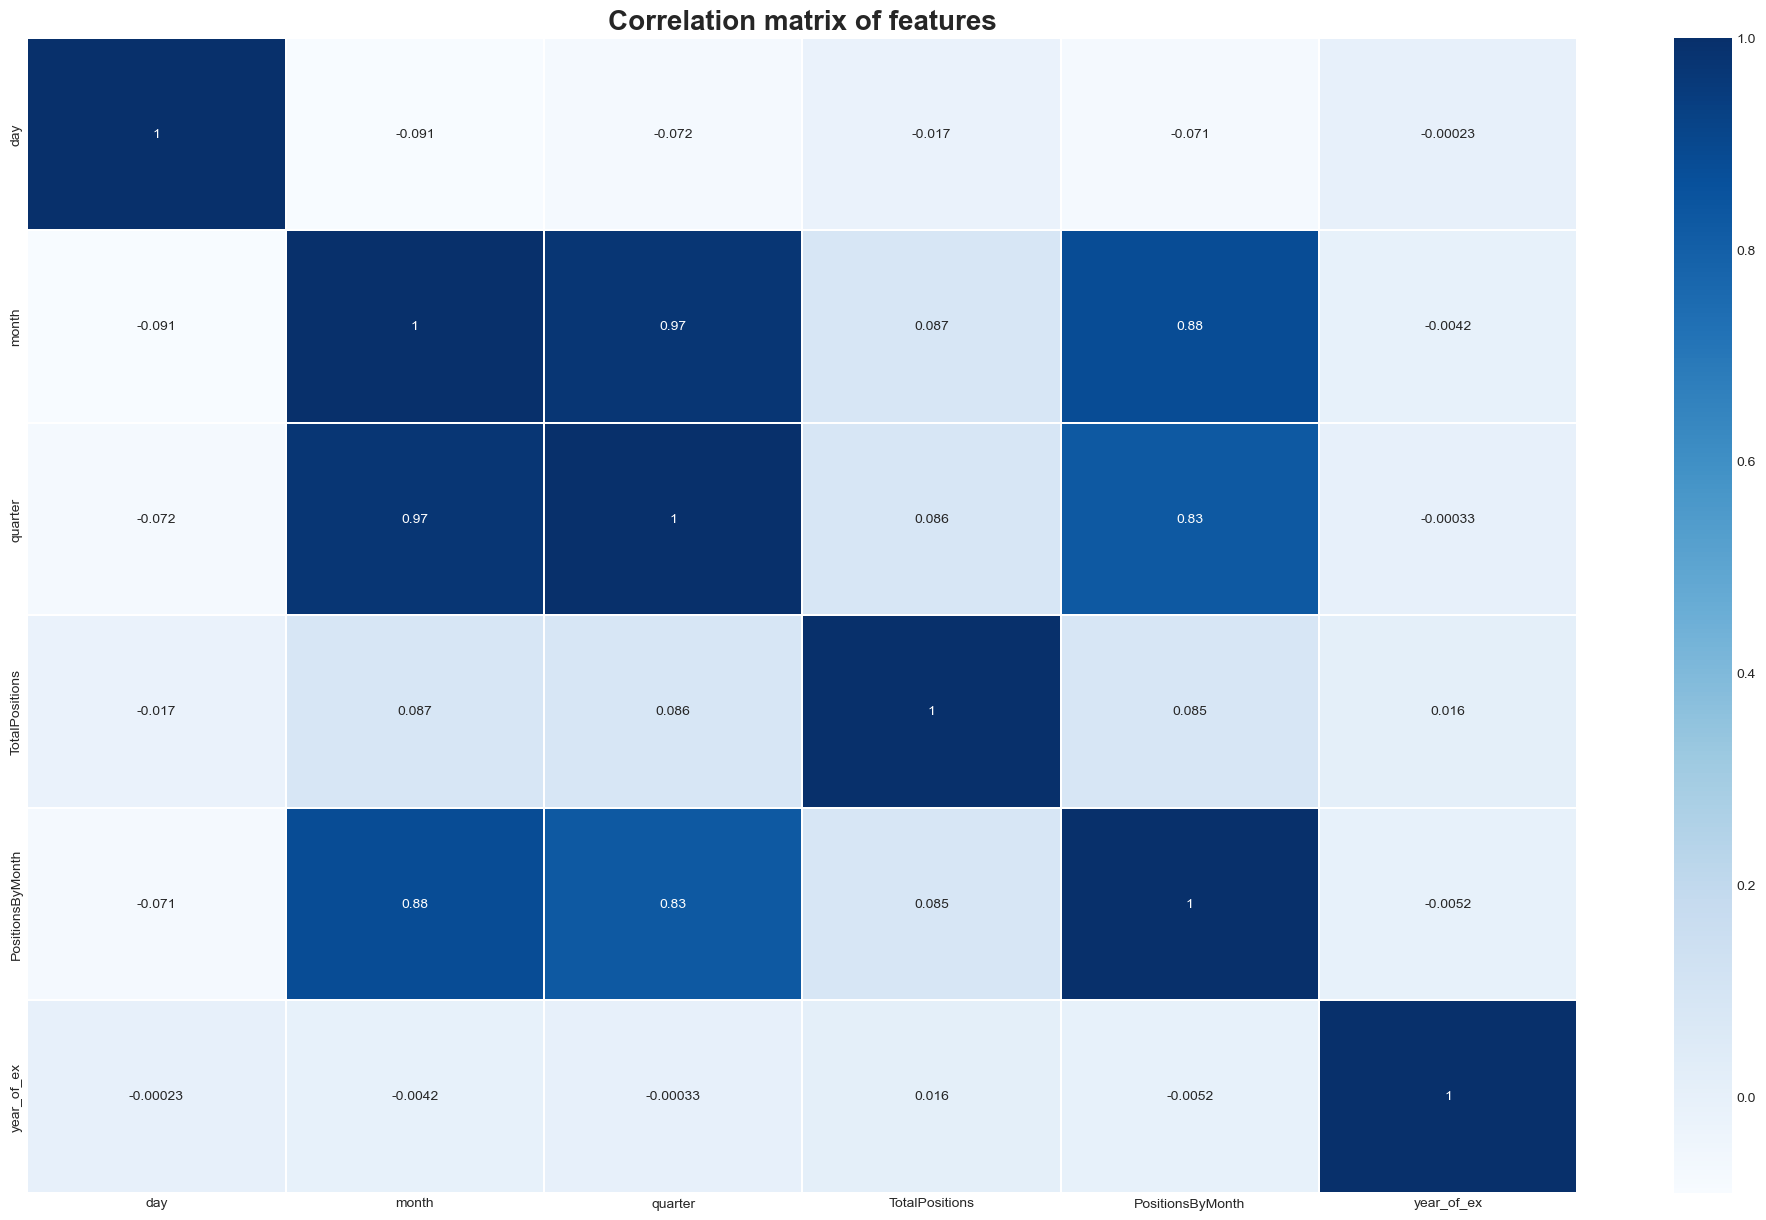

In [8]:
#Set fig size
fig, ax = plt.subplots(figsize=(25,15)) 

# Creating plot
corr = df.corr()

#plotting heatmap-plot
sns.heatmap(corr,annot=True, cmap = "Blues", linewidth = 0.30)

# Add title
plt.title("Correlation matrix of features",fontweight="bold",fontsize=20)

# show plot
plt.show()

***

### Feature Engineering and Feature Selection

***

In [9]:
df.isna().sum()

position            0
company             2
level               0
job_functions       0
industries          0
description         0
day                 0
month               0
quarter             0
city                0
Regions             0
industry_cat        0
TotalPositions      0
PositionsByMonth    0
year_of_ex          0
degrees             0
dtype: int64

In [10]:
df.degrees.value_counts()

Higher Vocational Education    22144
bachelor                       12676
diploma                         3024
master                          2490
student                          121
Doctorate                         45
Name: degrees, dtype: int64

In [11]:
df['degrees'] = df['degrees'].map({'student':0, 'diploma':1,'bachelor':2,'Higher Vocational Education':3, 'master':4, 'Doctorate':5})


In [12]:
df.head()

,position,company,level,job_functions,industries,description,day,month,quarter,city,Regions,industry_cat,TotalPositions,PositionsByMonth,year_of_ex,degrees
0,Employee Engagement Specialist,PepsiCo,MidSenior level,Human Resources,Consumer Goods Food Beverages,uto req id 199735brjob descriptionpepsico sud...,6,1,1,Riyadh,Riyadh,Consumer Goods,219,2339,3,2
1,Account Manager GPS Riyadh,EY,Not Applicable,Sales Business Development,Accounting Financial Services,busess where re our people re our products ...,6,1,1,Riyadh,Riyadh,Accounting,101,2339,7,3
2,Business Analyst,تطوير تقنيات التعليم Tatweer Educational Tech...,MidSenior level,Business Development Sales,Information Technology and Services,the idel cidte will design gnize modify the...,6,1,1,Riyadh,Riyadh,Information Technology and Services,16,2339,5,2
3,Talent Acquisition Advisor,WSP in the Middle East,Associate,Finance,Construction,thk bigger scle thk higher prile thk ground ...,6,1,1,Riyadh,Riyadh,Construction,43,2339,5,3
4,Organisational Design Specialist,Aventus Global Talent,MidSenior level,Human Resources Design,Financial Services Banking,gntionl design specilt estern region sudi rb...,6,1,1,Remote,Remote,Financial Services,28,2339,5,2


In [13]:
df.columns

Index(['position', 'company', 'level', 'job_functions', 'industries',
       'description', 'day', 'month', 'quarter', 'city', 'Regions',
       'industry_cat', 'TotalPositions', 'PositionsByMonth', 'year_of_ex',
       'degrees'],
      dtype='object')

In [14]:
df.Regions.value_counts()

Riyadh              18542
Remote               8249
Eastern              5276
Makkah               5231
Medina               1645
Jazan                 739
AlQassim              294
Tabuk                 200
Asir                  145
NotDefind              49
AlJawf                 35
Northern Borders       30
Hail                   29
AlBahah                29
Najran                  7
Name: Regions, dtype: int64

In [15]:
# Encoding the "Regions" using LabelEncoder
le = LabelEncoder()

df['Regions'] = le.fit_transform(df['Regions'])

In [16]:
le.classes_

array(['AlBahah', 'AlJawf ', 'AlQassim', 'Asir', 'Eastern', 'Hail',
       'Jazan', 'Makkah', 'Medina', 'Najran', 'Northern Borders',
       'NotDefind', 'Remote', 'Riyadh', 'Tabuk'], dtype=object)

In [17]:
df.level.value_counts()

MidSenior level    12090
Entry level        10696
Associate          10411
Not Applicable      3870
Director            2265
Executive            791
Internship           377
Name: level, dtype: int64

In [18]:
df['level'] = df['level'].map({'Not Applicable':0, 'Internship':1,'Entry level':2,'Associate':3, 'MidSenior level':4, 'Director':5, 'Executive':6})


In [19]:
df.head()

,position,company,level,job_functions,industries,description,day,month,quarter,city,Regions,industry_cat,TotalPositions,PositionsByMonth,year_of_ex,degrees
0,Employee Engagement Specialist,PepsiCo,4,Human Resources,Consumer Goods Food Beverages,uto req id 199735brjob descriptionpepsico sud...,6,1,1,Riyadh,13,Consumer Goods,219,2339,3,2
1,Account Manager GPS Riyadh,EY,0,Sales Business Development,Accounting Financial Services,busess where re our people re our products ...,6,1,1,Riyadh,13,Accounting,101,2339,7,3
2,Business Analyst,تطوير تقنيات التعليم Tatweer Educational Tech...,4,Business Development Sales,Information Technology and Services,the idel cidte will design gnize modify the...,6,1,1,Riyadh,13,Information Technology and Services,16,2339,5,2
3,Talent Acquisition Advisor,WSP in the Middle East,3,Finance,Construction,thk bigger scle thk higher prile thk ground ...,6,1,1,Riyadh,13,Construction,43,2339,5,3
4,Organisational Design Specialist,Aventus Global Talent,4,Human Resources Design,Financial Services Banking,gntionl design specilt estern region sudi rb...,6,1,1,Remote,12,Financial Services,28,2339,5,2


In [20]:
df.industry_cat.value_counts()

Information Technology and Services    6203
Construction                           3658
Marketing and Advertising              1894
Consumer Goods                         1584
Computer Software                      1481
                                       ... 
Glass Ceramics                            3
Photography                               2
Quality Assurance                         1
Customer Service Sales                    1
Fine Art                                  1
Name: industry_cat, Length: 130, dtype: int64

In [21]:
df.columns

Index(['position', 'company', 'level', 'job_functions', 'industries',
       'description', 'day', 'month', 'quarter', 'city', 'Regions',
       'industry_cat', 'TotalPositions', 'PositionsByMonth', 'year_of_ex',
       'degrees'],
      dtype='object')

In [22]:
# Encoding the industry_cat by using OneHOt because no need to order it, all values the same level 
one_hot = OneHotEncoder()

col_name = ['industries']

one_hot_df = one_hot.fit_transform(df[col_name]).toarray()

In [23]:
one_hot.categories_[0]

array(['Accounting',
       'Accounting AirlinesAviation Alternative Dispute Resolution',
       'Accounting Architecture  Planning Commercial Real Estate', ...,
       'Wholesale Retail Consumer Goods', 'Writing and Editing',
       'Writing and Editing Online Media Marketing and Advertising'],
      dtype=object)

In [24]:
column_names = []

for i in range(len(one_hot.categories_)):
    for j in range(len(one_hot.categories_[i])):
        column_names.append(col_name[i]+'_'+one_hot.categories_[i][j])

In [25]:
column_names

['industries_Accounting',
 'industries_Accounting AirlinesAviation Alternative Dispute Resolution',
 'industries_Accounting Architecture  Planning Commercial Real Estate',
 'industries_Accounting Automotive Financial Services',
 'industries_Accounting Aviation  Aerospace Financial Services',
 'industries_Accounting Banking Financial Services',
 'industries_Accounting Construction',
 'industries_Accounting Construction Financial Services',
 'industries_Accounting Consumer Goods Dairy',
 'industries_Accounting Dairy Apparel  Fashion',
 'industries_Accounting Entertainment',
 'industries_Accounting Financial Services',
 'industries_Accounting Financial Services Banking',
 'industries_Accounting Financial Services Capital Markets',
 'industries_Accounting Financial Services Construction',
 'industries_Accounting Financial Services Education Management',
 'industries_Accounting Financial Services Hospital  Health Care',
 'industries_Accounting Financial Services Information Technology and S

In [26]:
oh_df = pd.DataFrame(one_hot_df, index=df.index, columns=column_names)

In [27]:
# append the one hot data frame to our original dataset
for col in oh_df.columns:
    df[col] = oh_df[col]
    
# drop the encoded columns    
df.drop(col_name, axis=1, inplace=True)

In [28]:
df.head()

,position,company,level,job_functions,description,day,month,quarter,city,Regions,...,industries_Wholesale Logistics and Supply Chain,industries_Wholesale Logistics and Supply Chain Consumer Goods,industries_Wholesale Logistics and Supply Chain Cosmetics,industries_Wholesale Logistics and Supply Chain Medical Devices,industries_Wholesale Market Research Business Supplies and Equipment,industries_Wholesale Mechanical or Industrial Engineering,industries_Wholesale Pharmaceuticals Medical Devices,industries_Wholesale Retail Consumer Goods,industries_Writing and Editing,industries_Writing and Editing Online Media Marketing and Advertising
0,Employee Engagement Specialist,PepsiCo,4,Human Resources,uto req id 199735brjob descriptionpepsico sud...,6,1,1,Riyadh,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Account Manager GPS Riyadh,EY,0,Sales Business Development,busess where re our people re our products ...,6,1,1,Riyadh,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Business Analyst,تطوير تقنيات التعليم Tatweer Educational Tech...,4,Business Development Sales,the idel cidte will design gnize modify the...,6,1,1,Riyadh,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Talent Acquisition Advisor,WSP in the Middle East,3,Finance,thk bigger scle thk higher prile thk ground ...,6,1,1,Riyadh,13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Organisational Design Specialist,Aventus Global Talent,4,Human Resources Design,gntionl design specilt estern region sudi rb...,6,1,1,Remote,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Split Data 

In [29]:
smaller_df=df.drop(['description','day','month','quarter','city','company','position','industry_cat','job_functions'],axis=1)    



In [30]:
smaller_df.head()

,level,Regions,TotalPositions,PositionsByMonth,year_of_ex,degrees,industries_Accounting,industries_Accounting AirlinesAviation Alternative Dispute Resolution,industries_Accounting Architecture Planning Commercial Real Estate,industries_Accounting Automotive Financial Services,...,industries_Wholesale Logistics and Supply Chain,industries_Wholesale Logistics and Supply Chain Consumer Goods,industries_Wholesale Logistics and Supply Chain Cosmetics,industries_Wholesale Logistics and Supply Chain Medical Devices,industries_Wholesale Market Research Business Supplies and Equipment,industries_Wholesale Mechanical or Industrial Engineering,industries_Wholesale Pharmaceuticals Medical Devices,industries_Wholesale Retail Consumer Goods,industries_Writing and Editing,industries_Writing and Editing Online Media Marketing and Advertising
0,4,13,219,2339,3,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,13,101,2339,7,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,13,16,2339,5,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,13,43,2339,5,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,12,28,2339,5,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df_train, df_test = train_test_split(smaller_df, test_size=0.3, random_state=42 )
x,y = df_train.drop(['level'],axis=1),df_train['level']

In [32]:
x_train,y_train = df_train.drop(['level'],axis=1),df_train['level']
x_test,y_test= df_test.drop(['level'],axis=1),df_test['level']

In [33]:
# describes info about train and test set
print("Number transactions X_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (28350, 3156)
Number transactions y_train dataset:  (28350,)
Number transactions X_test dataset:  (12150, 3156)
Number transactions y_test dataset:  (12150,)


### Scalling Data

In [34]:
#For smaller df
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test= scaler.transform(x_test)

***

## Build Models 

***

### Experimment:1- LogisticRegression 

In [62]:
# Logestic Regression Model
log_classifier = LogisticRegression(random_state=42)

log_classifier.fit(x_train, y_train)
preds_log_classifier = log_classifier.predict(x_test)


In [63]:
# print training and testing accuracy 
lr_train = round(log_classifier.score(x_train, y_train),2)*100
lr_test = round(log_classifier.score(x_test, y_test),2)*100

print(f'Training Accuracy: {lr_train}%')
print(f'Test Set Accuracy: {lr_test}%')

Training Accuracy: 57.99999999999999%
Test Set Accuracy: 52.0%


In [64]:
#print accuracy , precision and recall scores 
print('Scores for Logistic Regression Classification:\n_____________________________________')
print('accuracy',accuracy_score((y_test), preds_log_classifier))
print('precision',precision_score((y_test), preds_log_classifier,pos_label='positive' ,average='micro'))
print('recall',recall_score(y_test, preds_log_classifier,pos_label='positive' ,average='micro'))

Scores for Logistic Regression Classification:
_____________________________________
accuracy 0.5189300411522634
precision 0.5189300411522634
recall 0.5189300411522634


In [65]:
# print classification report 
print(classification_report(y_test, preds_log_classifier))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68      1149
           1       0.32      0.16      0.22       123
           2       0.50      0.55      0.52      3166
           3       0.46      0.41      0.44      3216
           4       0.53      0.65      0.59      3614
           5       0.47      0.13      0.21       664
           6       0.51      0.09      0.15       218

    accuracy                           0.52     12150
   macro avg       0.50      0.38      0.40     12150
weighted avg       0.52      0.52      0.51     12150



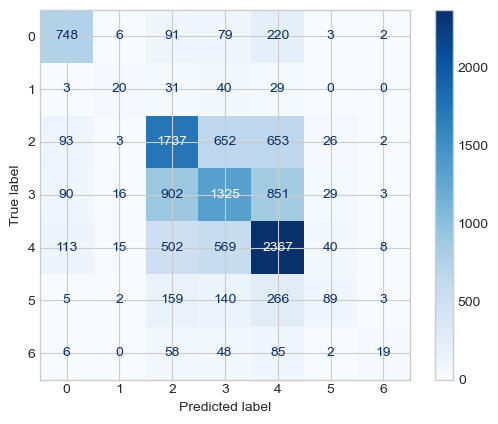

In [66]:
# plot confusion matrix
plot_confusion_matrix(log_classifier, x_test, y_test, cmap='Blues')

### Experimment:2 RandomForest Classifier 

In [202]:
# Random forest model for classification
class_forest = RandomForestClassifier(n_estimators=10,
    random_state=42)
class_forest.fit(x_train, y_train)

preds_class = class_forest.predict(x_test)

In [203]:
val_train = round(class_forest.score(x_train, y_train),2)*100
val_test = round(class_forest.score(x_test, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 91.0%
Test Set Accuracy: 60.0%


In [204]:
#print accuracy , precision and recall scores 
print('Scores for Random Forest Classifier :\n_____________________________________')
print('accuracy',accuracy_score((y_test), preds_class))
print('precision',precision_score((y_test), preds_class,pos_label='positive' ,average='micro'))
print('recall',recall_score(y_test, preds_class,pos_label='positive' ,average='micro'))

Scores for Random Forest Classifier :
_____________________________________
accuracy 0.5990123456790123
precision 0.5990123456790123
recall 0.5990123456790123


In [205]:
# print classification report 
print(classification_report(y_test, preds_class))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1149
           1       0.81      0.47      0.59       123
           2       0.56      0.62      0.59      3166
           3       0.54      0.53      0.53      3216
           4       0.64      0.68      0.66      3614
           5       0.40      0.22      0.28       664
           6       0.57      0.31      0.40       218

    accuracy                           0.60     12150
   macro avg       0.62      0.52      0.55     12150
weighted avg       0.60      0.60      0.59     12150



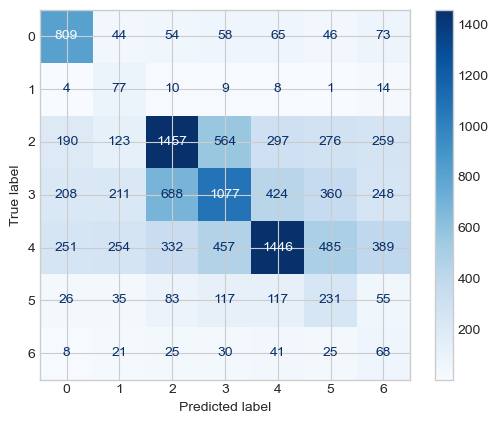

In [206]:
# plot confusion matrix
plot_confusion_matrix(log_classifier, x_test, y_test, cmap='Blues')

### Experimment:3- XGB Classifier


In [72]:
xgb = XGBClassifier(random_state=42)
xgb.fit(x_train, y_train)

preds_xgb = xgb.predict(x_test)


In [73]:
val_train_xgb = round(xgb.score(x_train, y_train),2)*100
val_test_xgb = round(xgb.score(x_test, y_test),2)*100

print(f'Training Accuracy: {val_train_xgb}%')
print(f'Test Set Accuracy: {val_test_xgb}%')

Training Accuracy: 62.0%
Test Set Accuracy: 57.99999999999999%


In [74]:
#print accuracy , precision and recall scores 
print('Scores for XGB Classifier:\n_____________________________________')
print('accuracy',accuracy_score((y_test), preds_xgb))
print('precision',precision_score((y_test), preds_xgb,pos_label='positive' ,average='micro'))
print('recall',recall_score(y_test, preds_xgb, pos_label='positive' ,average='micro'))



Scores for XGB Classifier:
_____________________________________
accuracy 0.5754732510288065
precision 0.5754732510288065
recall 0.5754732510288065


In [75]:
# print classification report 
print(classification_report(y_test, preds_xgb))

              precision    recall  f1-score   support

           0       0.94      0.69      0.80      1149
           1       0.68      0.59      0.63       123
           2       0.54      0.60      0.57      3166
           3       0.53      0.45      0.49      3216
           4       0.56      0.73      0.63      3614
           5       0.54      0.10      0.17       664
           6       0.57      0.26      0.35       218

    accuracy                           0.58     12150
   macro avg       0.62      0.49      0.52     12150
weighted avg       0.58      0.58      0.56     12150



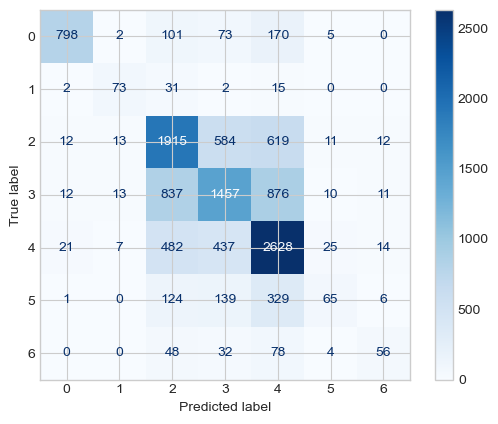

In [76]:
# plot confusion matrix
plot_confusion_matrix(xgb, x_test, y_test, cmap='Blues')

### Experimment:4- KNeighbors Classifier



In [142]:
# K-Neighbors
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train, y_train)
preds_kn = kn.predict(x_test)


In [143]:
val_train_kn = round(kn.score(x_train, y_train),2)*100
val_test_kn = round(kn.score(x_test, y_test),2)*100

print(f'Training Accuracy: {val_train_kn}%')
print(f'Test Set Accuracy: {val_test_kn}%')

Training Accuracy: 68.0%
Test Set Accuracy: 55.00000000000001%


In [144]:
#print accuracy , precision and recall scores 
print('Scores for XGB Classifier:\n_____________________________________')
print('accuracy',accuracy_score((y_test), preds_kn))
print('precision',precision_score((y_test), preds_kn,pos_label='positive' ,average='micro'))
print('recall',recall_score(y_test, preds_kn, pos_label='positive' ,average='micro'))

Scores for XGB Classifier:
_____________________________________
accuracy 0.548641975308642
precision 0.548641975308642
recall 0.548641975308642


In [145]:
# print classification report 
print(classification_report(y_test, preds_kn))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1149
           1       0.51      0.38      0.44       123
           2       0.49      0.62      0.55      3166
           3       0.50      0.48      0.49      3216
           4       0.62      0.59      0.60      3614
           5       0.41      0.14      0.21       664
           6       0.45      0.16      0.24       218

    accuracy                           0.55     12150
   macro avg       0.52      0.45      0.46     12150
weighted avg       0.55      0.55      0.54     12150



***

## Solve Overfitting Problem

***

## 1- plot training set before sampling

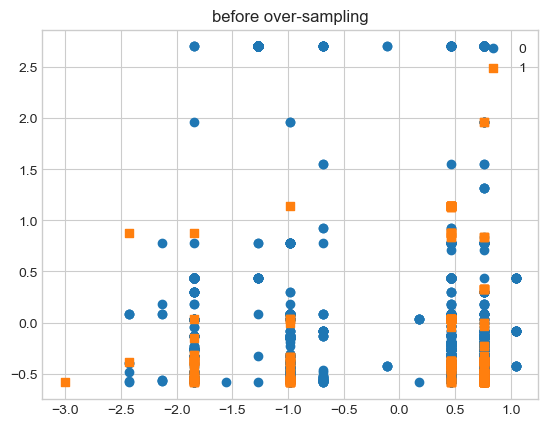

In [148]:
# polt before oversampling 
def plot_2d_space(x, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            x[y==l, 0],
            x[y==l, 1],
            
            
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()



plot_2d_space(x_train, y_train, 'before over-sampling')

##  Resample

In [35]:
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '2': {}".format(sum(y_train == 2)))
print("Before OverSampling, counts of label '3': {}".format(sum(y_train == 3)))
print("Before OverSampling, counts of label '4': {}".format(sum(y_train == 4)))
print("Before OverSampling, counts of label '5': {}".format(sum(y_train == 5)))
print("Before OverSampling, counts of label '6': {} \n".format(sum(y_train == 6)))
  

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())



 
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

  
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res == 3)))
print("After OverSampling, counts of label '4': {}".format(sum(y_train_res == 4)))
print("After OverSampling, counts of label '5': {}".format(sum(y_train_res == 5)))
print("After OverSampling, counts of label '6': {}".format(sum(y_train_res == 6)))

Before OverSampling, counts of label '0': 2721
Before OverSampling, counts of label '1': 254
Before OverSampling, counts of label '2': 7530
Before OverSampling, counts of label '3': 7195
Before OverSampling, counts of label '4': 8476
Before OverSampling, counts of label '5': 1601
Before OverSampling, counts of label '6': 573 

After OverSampling, the shape of train_X: (59332, 3156)
After OverSampling, the shape of train_y: (59332,) 

After OverSampling, counts of label '0': 8476
After OverSampling, counts of label '1': 8476
After OverSampling, counts of label '2': 8476
After OverSampling, counts of label '3': 8476
After OverSampling, counts of label '4': 8476
After OverSampling, counts of label '5': 8476
After OverSampling, counts of label '6': 8476


In [36]:
print("Before OverSampling, counts of label '0': {}".format(sum(y_test == 0)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_test == 1)))
print("Before OverSampling, counts of label '2': {}".format(sum(y_test == 2)))
print("Before OverSampling, counts of label '3': {}".format(sum(y_test == 3)))
print("Before OverSampling, counts of label '4': {}".format(sum(y_test == 4)))
print("Before OverSampling, counts of label '5': {}".format(sum(y_test == 5)))
print("Before OverSampling, counts of label '6': {} \n".format(sum(y_test == 6)))
  

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_test_res, y_test_res = sm.fit_resample(x_test, y_test.ravel())



 
print('After OverSampling, the shape of test_X: {}'.format(X_test_res.shape))
print('After OverSampling, the shape of test_y: {} \n'.format(y_test_res.shape))

  
print("After OverSampling, counts of label '0': {}".format(sum(y_test_res == 0)))
print("After OverSampling, counts of label '1': {}".format(sum(y_test_res == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_test_res == 2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_test_res == 3)))
print("After OverSampling, counts of label '4': {}".format(sum(y_test_res == 4)))
print("After OverSampling, counts of label '5': {}".format(sum(y_test_res == 5)))
print("After OverSampling, counts of label '6': {}".format(sum(y_test_res == 6)))

Before OverSampling, counts of label '0': 1149
Before OverSampling, counts of label '1': 123
Before OverSampling, counts of label '2': 3166
Before OverSampling, counts of label '3': 3216
Before OverSampling, counts of label '4': 3614
Before OverSampling, counts of label '5': 664
Before OverSampling, counts of label '6': 218 

After OverSampling, the shape of test_X: (25298, 3156)
After OverSampling, the shape of test_y: (25298,) 

After OverSampling, counts of label '0': 3614
After OverSampling, counts of label '1': 3614
After OverSampling, counts of label '2': 3614
After OverSampling, counts of label '3': 3614
After OverSampling, counts of label '4': 3614
After OverSampling, counts of label '5': 3614
After OverSampling, counts of label '6': 3614


## 2- plot training set After sampling

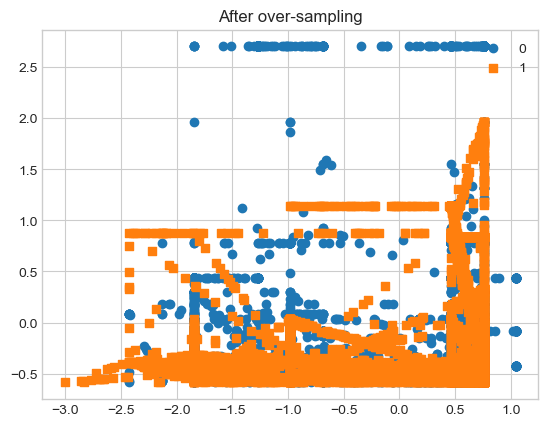

In [38]:
# polt after oversampling 
def plot_2d_space(x, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            x[y==l, 0],
            x[y==l, 1],
            
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()



plot_2d_space(X_train_res, y_train_res, 'After over-sampling')

## Models after Resample problem solving

## ---> Logistic Regression

In [188]:
# Logestic Regression Model
log_classifier = LogisticRegression(random_state=42)

log_classifier.fit(X_train_res, y_train_res)
preds_log_classifier = log_classifier.predict(X_test_res)

# print training and testing accuracy 
lr_train = round(log_classifier.score(X_train_res, y_train_res),2)*100
lr_test = round(log_classifier.score(X_test_res, y_test_res),2)*100

print(f'Training Accuracy: {lr_train}%')
print(f'Test Set Accuracy: {lr_test}%')


Training Accuracy: 61.0%
Test Set Accuracy: 41.0%


In [189]:
# print classification report 
print(classification_report(y_test_res, preds_log_classifier))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70      3614
           1       0.60      0.45      0.51      3614
           2       0.39      0.46      0.42      3614
           3       0.26      0.33      0.29      3614
           4       0.29      0.40      0.33      3614
           5       0.40      0.30      0.34      3614
           6       0.36      0.25      0.29      3614

    accuracy                           0.41     25298
   macro avg       0.43      0.41      0.41     25298
weighted avg       0.43      0.41      0.41     25298



## ---> Random Forest

In [194]:
# Random forest model for classification
class_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
class_forest.fit(X_train_res, y_train_res)

preds_class = class_forest.predict(X_test_res)

val_train = round(class_forest.score(X_train_res, y_train_res),2)*100
val_test = round(class_forest.score(X_test_res, y_test_res),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 96.0%
Test Set Accuracy: 55.00000000000001%


In [195]:
# print classification report 
print(classification_report(y_test_res, preds_class))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      3614
           1       0.93      0.54      0.68      3614
           2       0.45      0.60      0.51      3614
           3       0.40      0.53      0.46      3614
           4       0.46      0.65      0.54      3614
           5       0.48      0.40      0.44      3614
           6       0.68      0.35      0.46      3614

    accuracy                           0.55     25298
   macro avg       0.60      0.55      0.56     25298
weighted avg       0.60      0.55      0.56     25298



## ---> XGB Classifier

In [198]:
xgb = XGBClassifier(random_state=100)
xgb.fit(X_train_res, y_train_res)

preds_xgb = xgb.predict(X_test_res)

val_train_xgb = round(xgb.score(X_train_res, y_train_res),2)*100
val_test_xgb = round(xgb.score(X_test_res, y_test_res),2)*100

print(f'Training Accuracy: {val_train_xgb}%')
print(f'Test Set Accuracy: {val_test_xgb}%')

Training Accuracy: 77.0%
Test Set Accuracy: 64.0%


In [199]:
# print classification report 
print(classification_report(y_test_res, preds_xgb))

              precision    recall  f1-score   support

           0       0.93      0.76      0.83      3614
           1       0.96      0.89      0.92      3614
           2       0.53      0.55      0.54      3614
           3       0.44      0.46      0.45      3614
           4       0.51      0.65      0.57      3614
           5       0.54      0.53      0.54      3614
           6       0.70      0.61      0.65      3614

    accuracy                           0.64     25298
   macro avg       0.66      0.64      0.64     25298
weighted avg       0.66      0.64      0.64     25298



## ---> K-Neighbors

In [196]:
# K-Neighbors
kn = KNeighborsClassifier(n_neighbors=27)
kn.fit(X_train_res, y_train_res)
preds_kn = kn.predict(X_test_res)

val_train_kn = round(kn.score(X_train_res, y_train_res),2)*100
val_test_kn = round(kn.score(X_test_res, y_test_res),2)*100

print(f'Training Accuracy: {val_train_kn}%')
print(f'Test Set Accuracy: {val_test_kn}%')

Training Accuracy: 64.0%
Test Set Accuracy: 47.0%


In [197]:
# print classification report 
print(classification_report(y_test_res, preds_kn))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      3614
           1       0.36      0.80      0.50      3614
           2       0.46      0.43      0.45      3614
           3       0.42      0.32      0.36      3614
           4       0.52      0.32      0.39      3614
           5       0.39      0.29      0.33      3614
           6       0.48      0.35      0.41      3614

    accuracy                           0.47     25298
   macro avg       0.48      0.47      0.46     25298
weighted avg       0.48      0.47      0.46     25298



--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Overfitting Analysis 

>> Which is analysis of learning dynamics methods that can help to identify whether a model has overfit the training dataset and suggest an alternate configuration to use that could result in better predictive performance.

### >> Random Forest


>1, train: 0.875, test: 0.513
>2, train: 0.878, test: 0.495
>3, train: 0.922, test: 0.519
>4, train: 0.933, test: 0.529
>5, train: 0.943, test: 0.536
>6, train: 0.947, test: 0.543
>7, train: 0.952, test: 0.553
>8, train: 0.954, test: 0.551
>9, train: 0.955, test: 0.554
>10, train: 0.957, test: 0.553
>11, train: 0.958, test: 0.560
>12, train: 0.959, test: 0.563
>13, train: 0.959, test: 0.567
>14, train: 0.959, test: 0.566
>15, train: 0.959, test: 0.571
>16, train: 0.960, test: 0.572
>17, train: 0.960, test: 0.577
>18, train: 0.960, test: 0.580
>19, train: 0.960, test: 0.582
>20, train: 0.960, test: 0.583
>21, train: 0.961, test: 0.583
>22, train: 0.961, test: 0.583
>23, train: 0.961, test: 0.583
>24, train: 0.961, test: 0.583


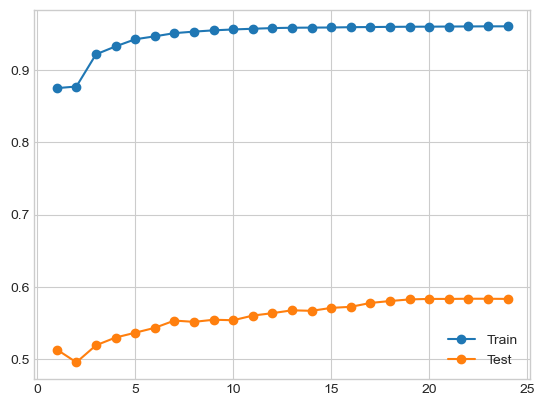

In [209]:
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 25)]
# evaluate a decision tree for each depth
for i in values:
# configure the model
    model = RandomForestClassifier(n_estimators = i, criterion = 'entropy', random_state = 42)
    # fit model on the training dataset
    model.fit(X_train_res, y_train_res)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train_res)
    train_acc = accuracy_score(y_train_res, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test_res)
    test_acc = accuracy_score(y_test_res, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

### >> KNeighborsClassifier

>1, train: 0.894, test: 0.537
>2, train: 0.742, test: 0.513
>3, train: 0.711, test: 0.520
>4, train: 0.681, test: 0.518
>5, train: 0.656, test: 0.523
>6, train: 0.637, test: 0.515
>7, train: 0.624, test: 0.509
>8, train: 0.616, test: 0.507
>9, train: 0.605, test: 0.507
>10, train: 0.596, test: 0.501
>11, train: 0.589, test: 0.498
>12, train: 0.582, test: 0.498
>13, train: 0.576, test: 0.497
>14, train: 0.566, test: 0.494
>15, train: 0.564, test: 0.495
>16, train: 0.558, test: 0.495
>17, train: 0.556, test: 0.494
>18, train: 0.552, test: 0.493
>19, train: 0.547, test: 0.487
>20, train: 0.545, test: 0.484
>21, train: 0.543, test: 0.488
>22, train: 0.540, test: 0.484
>23, train: 0.539, test: 0.483
>24, train: 0.536, test: 0.481
>25, train: 0.534, test: 0.483
>26, train: 0.532, test: 0.481
>27, train: 0.529, test: 0.481
>28, train: 0.527, test: 0.478
>29, train: 0.524, test: 0.480
>30, train: 0.524, test: 0.477
>31, train: 0.521, test: 0.476
>32, train: 0.519, test: 0.475
>33, train: 0.518

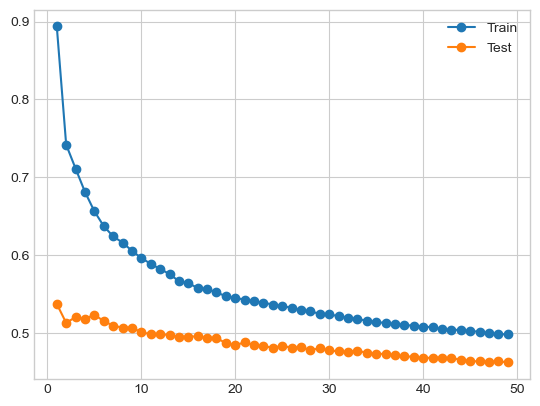

In [80]:
train_scores2, test_scores2 = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 50)]
# evaluate a decision tree for each depth
for i in values:
# configure the model
	model2 = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model2.fit(x_train, y_train)
	# evaluate on the train dataset
	train_yhat2 = model2.predict(x_train)
	train_acc2 = accuracy_score(y_train, train_yhat2)
	train_scores2.append(train_acc2)
	# evaluate on the test dataset
	test_yhat2 = model2.predict(x_test)
	test_acc2 = accuracy_score(y_test, test_yhat2)
	test_scores2.append(test_acc2)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc2, test_acc2))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores2, '-o', label='Train')
pyplot.plot(values, test_scores2, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [216]:
# K-Neighbors
kn = KNeighborsClassifier(n_neighbors=27) #add the best n_neighbors according to overfitting analysis results
class_forest.fit(X_train_res, y_train_res)
kn.fit(X_train_res, y_train_res)
preds_kn = kn.predict(X_test_res)

val_train_kn = round(kn.score(X_train_res, y_train_res),2)*100
val_test_kn = round(kn.score(X_test_res, y_test_res),2)*100

print(f'Training Accuracy: {val_train_kn}%')
print(f'Test Set Accuracy: {val_test_kn}%')

Training Accuracy: 64.0%
Test Set Accuracy: 47.0%


## >> Logistic Regression 

>1, train: 0.549, test: 0.447
>2, train: 0.558, test: 0.450
>3, train: 0.580, test: 0.457
>4, train: 0.580, test: 0.451
>5, train: 0.586, test: 0.449
>6, train: 0.588, test: 0.453
>7, train: 0.596, test: 0.454
>8, train: 0.596, test: 0.453
>9, train: 0.596, test: 0.452
>10, train: 0.598, test: 0.448
>11, train: 0.601, test: 0.449
>12, train: 0.603, test: 0.450
>13, train: 0.604, test: 0.450
>14, train: 0.604, test: 0.450
>15, train: 0.603, test: 0.449
>16, train: 0.602, test: 0.446
>17, train: 0.603, test: 0.447
>18, train: 0.604, test: 0.446
>19, train: 0.604, test: 0.445


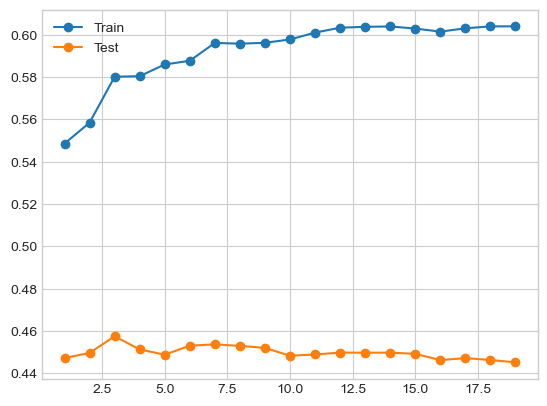

In [44]:
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 20)]
# evaluate a decision tree for each depth
for i in values:
# configure the model
    model3 = LogisticRegression(max_iter=i,random_state=42)
    # fit model on the training dataset
    model3.fit(X_train_res, y_train_res)
    # evaluate on the train dataset
    train_yhat3 = model3.predict(X_train_res)
    train_acc3 = accuracy_score(y_train_res, train_yhat3)
    train_scores.append(train_acc3)
    # evaluate on the test dataset
    test_yhat3 = model3.predict(X_test_res)
    test_acc3 = accuracy_score(y_test_res, test_yhat3)
    test_scores.append(test_acc3)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc3, test_acc3))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()


In [47]:
# Logestic Regression Model
log_classifier = LogisticRegression(max_iter=20, random_state=42) #add the best random_state according to overfitting analysis results

log_classifier.fit(X_train_res, y_train_res)
preds_log_classifier = log_classifier.predict(X_test_res)

val_train_log = round(log_classifier.score(X_train_res, y_train_res),2)*100
val_test_log = round(log_classifier.score(X_test_res, y_test_res),2)*100

print(f'Training Accuracy: {val_train_log}%')
print(f'Test Set Accuracy: {val_test_log}%')

Training Accuracy: 60.0%
Test Set Accuracy: 44.0%
